In [218]:
#import librari pandas_datareader untuk data eksternal dari web
import pandas_datareader as web
 
#import modul datetime merupakan internal datetime
import datetime
 
#datetime.datetime adalah tipe data dalam modul datetime
start = datetime.datetime(1980, 4, 1)
end = datetime.datetime(2020, 9, 20)
 
#metode DataReader musti spesifik namanya
df = web.DataReader("hmc", 'yahoo', start, end)
 
#dataframe disimpan sebagai file csv 
df.to_csv('HMC.csv')

In [219]:
#menampilkan informasi baris dan kolom, serta baris 5 pertama
df=pd.read_csv("HMC.csv")
print('Number of rows and columns:', df.shape)
df.head()

Number of rows and columns: (10205, 7)


,Date,High,Low,Open,Close,Volume,Adj Close
0,1980-04-01,0.909375,0.900000,0.909375,0.900000,6000.0,0.330650
1,1980-04-02,0.887500,0.887500,0.887500,0.887500,2000.0,0.326058
2,1980-04-03,0.878125,0.878125,0.878125,0.878125,2000.0,0.322614
3,1980-04-07,0.909375,0.903125,0.903125,0.909375,8000.0,0.334094
4,1980-04-08,0.912500,0.909375,0.909375,0.912500,28000.0,0.335242


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10205 entries, 0 to 10204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10205 non-null  object 
 1   High       10205 non-null  float64
 2   Low        10205 non-null  float64
 3   Open       10205 non-null  float64
 4   Close      10205 non-null  float64
 5   Volume     10205 non-null  float64
 6   Adj Close  10205 non-null  float64
dtypes: float64(6), object(1)
memory usage: 558.2+ KB


In [221]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [222]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [223]:
df = df[['Adj Close']]
df.tail()

,Adj Close
10200,25.340000
10201,25.540001
10202,24.969999
10203,24.930000
10204,24.719999


In [224]:
# Normalisasi data
from sklearn import preprocessing

values = df.values.reshape(-1,1)
values = values.astype('float32')
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [225]:
values

array([[ 0.33064994],
       [ 0.32605776],
       [ 0.32261354],
       ...,
       [24.97      ],
       [24.93      ],
       [24.72      ]], dtype=float32)

In [226]:
scaled

array([[2.3256335e-04],
       [9.9672005e-05],
       [0.0000000e+00],
       ...,
       [7.1326500e-01],
       [7.1210748e-01],
       [7.0603031e-01]], dtype=float32)

In [227]:
#membagi data Validation set sebesar 20% dari total dataset
training_size = int(len(scaled) * 0.7)
validasi_size = int(len(scaled) * 0.2)
test_size = int(len(scaled) * 0.1)
training, validasi, test = scaled[0:training_size,:], scaled[training_size:-(test_size),:], scaled[-(test_size):,:]
print(f'training: {len(training)}')
print(f'validation: {len(validasi)}')
print(f'test: {len(test)}')

training: 7143
validation: 2042
test: 1020


In [228]:
from itertools import chain

training = np.array(list(chain.from_iterable(training)))
validasi = np.array(list(chain.from_iterable(validasi)))
test = np.array(list(chain.from_iterable(test)))

In [229]:
training

array([2.3256335e-04, 9.9672005e-05, 0.0000000e+00, ..., 6.7032564e-01,
       6.6908097e-01, 6.9854105e-01], dtype=float32)

In [230]:
#membagi data sequence menjadi sample
def split_sequence(sequence, n_steps):
	X, Y = list(), list()
	for i in range(len(sequence)):
		end_iX = i + n_steps
		if end_iX > len(sequence)-1:
			break
		seq_X, seq_Y = sequence[i:end_iX], sequence[end_iX]
		X.append(seq_X)
		Y.append(seq_Y)
	return np.array(X), np.array(Y)

In [231]:
n_steps = 12
train_X, train_Y = split_sequence(train, n_steps)
val_X, val_Y = split_sequence(val, n_steps)
test_X, test_Y = split_sequence(test, n_steps)

In [232]:
train_X

array([[2.3256335e-04, 9.9672005e-05, 0.0000000e+00, ..., 7.6415855e-04,
        7.6415855e-04, 6.9770776e-04],
       [9.9672005e-05, 0.0000000e+00, 3.3223908e-04, ..., 7.6415855e-04,
        6.9770776e-04, 8.3060935e-04],
       [0.0000000e+00, 3.3223908e-04, 3.6546309e-04, ..., 6.9770776e-04,
        8.3060935e-04, 8.3060935e-04],
       ...,
       [6.9646662e-01, 6.8132150e-01, 6.8713081e-01, ..., 6.6244221e-01,
        6.7323017e-01, 6.7571986e-01],
       [6.8132150e-01, 6.8713081e-01, 6.8526328e-01, ..., 6.7323017e-01,
        6.7571986e-01, 6.7032564e-01],
       [6.8713081e-01, 6.8526328e-01, 6.8360370e-01, ..., 6.7571986e-01,
        6.7032564e-01, 6.6908097e-01]], dtype=float32)

In [233]:
n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
val_X = val_X.reshape((val_X.shape[0], val_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [234]:
#Membuat arsitektur LSTM
import tensorflow as tf
from keras.layers import LSTM
#Lapisan pertama adalah lapisan LSTM dengan 60 unit.
#fungsi aktivasi relu
#nilai prediksi tunggal yaitu 1
#menggunakan model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(LSTM(60), input_shape=(n_steps, n_features)),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(1)
])

#menggunakan Learning Rate pada Optimizer
optimizer = tf.keras.optimizers.Adam(lr=1.0e-03)
model.compile(optimizer=optimizer,loss=tf.keras.losses.Huber(),metrics=['mae'])

In [235]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.015 and logs.get('val_mae')<0.015):
      print("\nTraining sudah mencapai MAE < 10% skala data !!")
      self.model.stop_training = True

callbacks = myCallback()
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
            patience=5, min_lr=1.0e-04)

In [237]:
#melatih model
history = model.fit(train_X, train_Y, 
                    epochs=100, batch_size=128, 
                    validation_data=(val_X, val_Y), 
                    verbose=2, callbacks=[callbacks,reduce_lr])

Epoch 1/100
56/56 - 2s - loss: 0.0064 - mae: 0.0606 - val_loss: 3.7067e-04 - val_mae: 0.0206
Epoch 2/100
56/56 - 1s - loss: 6.8931e-05 - mae: 0.0075 - val_loss: 3.5528e-04 - val_mae: 0.0201
Epoch 3/100
56/56 - 1s - loss: 5.8228e-05 - mae: 0.0064 - val_loss: 3.5311e-04 - val_mae: 0.0202
Epoch 4/100
56/56 - 1s - loss: 5.7979e-05 - mae: 0.0064 - val_loss: 3.5131e-04 - val_mae: 0.0200
Epoch 5/100
56/56 - 1s - loss: 6.0312e-05 - mae: 0.0066 - val_loss: 3.4907e-04 - val_mae: 0.0202
Epoch 6/100
56/56 - 1s - loss: 5.7099e-05 - mae: 0.0064 - val_loss: 3.4003e-04 - val_mae: 0.0197
Epoch 7/100
56/56 - 1s - loss: 5.4581e-05 - mae: 0.0061 - val_loss: 3.4242e-04 - val_mae: 0.0200
Epoch 8/100
56/56 - 1s - loss: 5.4486e-05 - mae: 0.0061 - val_loss: 3.3555e-04 - val_mae: 0.0197
Epoch 9/100
56/56 - 1s - loss: 5.4556e-05 - mae: 0.0061 - val_loss: 3.3669e-04 - val_mae: 0.0196
Epoch 10/100
56/56 - 1s - loss: 5.4093e-05 - mae: 0.0061 - val_loss: 3.3381e-04 - val_mae: 0.0195
Epoch 11/100
56/56 - 1s - loss: 5

<function matplotlib.pyplot.show>

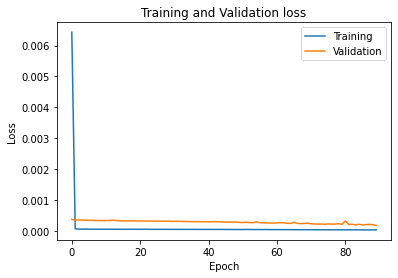

In [238]:
#plot loss dan akurasi pada saat training dan validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show

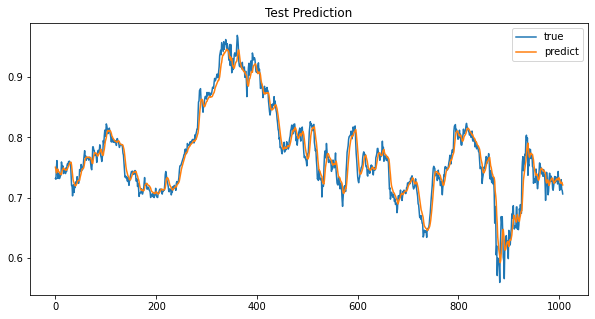

In [239]:
#memprediksi model text_X
y_hat = model.predict(test_X)
plt.figure(figsize=(10,5))
plt.plot(test_Y, label='true')
plt.plot(y_hat, label='predict')
plt.title('Test Prediction')
plt.legend()
plt.show()

In [240]:
#Balikkan skala nilai prediksi ke nilai semula
y_hat_inverse = scaler.inverse_transform(y_hat.reshape(-1, 1))
test_Y_inverse = scaler.inverse_transform(test_Y.reshape(-1, 1))

In [246]:
#Menghitung skala data
min_value = df.values.min()
max_value = df.values.max()
data_scale = max_value - min_value
ramalan = y_hat_inverse
aktual = test_Y_inverse
errors = ramalan - aktual
mae = np.abs(errors).mean()
print(f'MAE = {mae:.2f} < 10% skala data = {(0.1 * data_scale):.2f}')

MAE = 0.40 < 10% skala data = 3.46
